In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect, TVDNRankTuning
from pathlib import Path
from scipy.io import loadmat
from scipy.signal import detrend
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.signal import lfilter, firls, decimate
from tqdm import tqdm_notebook as tqdm
from easydict import EasyDict as edict
from collections import Counter
import pickle

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [4]:
fs = 0.5 #sampling frequency
fmin = 0.009 # 
fmax = 0.08
hbp = firls(21, np.array([0, 0.009, 0.01, 0.08, 0.09, 0.8]), #0.8
           desired = np.array([0, 0, 1, 1, 0, 0]))

num = fMRIs.shape[-1]
fMRIsHPF = []
for i in range(num):
    cfMRI = fMRIs[0, i]["fMRI"][:90, :]
    # detrend
    cfMRI = detrend(cfMRI)
    chpffMRI = lfilter(hbp, 1, cfMRI)
    fMRIsHPF.append(chpffMRI[:, 25:])

## Rank is selected from a range

### First method

Find the kappa such that the mean num of change points is closest to `5`. 

The rank is selected such that MSE is minimized

In [10]:
saveDir = resDir/"fMRIHPFs_fixnchg5"
if not saveDir.exists():
    saveDir.mkdir()

#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#ranks = [2, 4, 6, 8, 10, 12]
#
#cErr = np.inf
#cOptKappa = None
#ResObjs = None
#cOptRank = None
#for cRank in ranks:
#    numChgsAll = []
#    DetObjs = []
#    for ii in tqdm(range(243)):
#        Ymat = fMRIsHPF[ii]
#        DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                          saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=cRank)
#        DetRec()
#        DetRec.TuningKappa(kappas)
#        
#        DetObjs.append(DetRec)
#        numChgsAll.append(DetRec.numchgs)
#        
#    numChgsArr = np.array(numChgsAll)
#    idx = np.argmin(np.sum((numChgsArr - 5)**2, axis=0))
#    optKa = kappas[idx]
#    
#    # Update det obj
#    errs = []
#    for DetObj in DetObjs:
#        DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#        errs.append(DetObj.GetCurMSE())
#    err = np.mean(errs)
#    print(f"The current error of rank {cRank} is {err:.3f}, and kappa is {optKa:.3f}.")
#    if cErr > err:
#        ResObjs = DetObjs
#        cErr = err
#        cOptKappa = optKa
#        cOptRank = cRank
#        
#result = edict()
#result.DetObjs = ResObjs
#result.Err = cErr
#result.rank = cOptRank
#result.kappa = cOptKappa

#with open(saveDir/"fMRIResultFixnchg5.pkl", "wb") as f:
#    pickle.dump(result, f)
with open(saveDir/"fMRIResultFixnchg5.pkl", "rb") as f:
    result = pickle.load(f)

### Second method 


Find the kappa such that the mean num of change points is between `4` and `6` and the variance num of change points is minimized

The rank is selected such that MSE is minimized

In [11]:
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#ranks = [2, 4, 6, 8, 10, 12]
#
#cErr = np.inf
#cOptKappa = None
#ResObjs = None
#cOptRank = None
#for cRank in ranks:
#    numChgsAll = []
#    DetObjs = []
#    for ii in tqdm(range(243)):
#        Ymat = fMRIsHPF[ii]
#        DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                          saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=cRank)
#        DetRec()
#        DetRec.TuningKappa(kappas)
#        
#        DetObjs.append(DetRec)
#        numChgsAll.append(DetRec.numchgs)
#        
#    numChgsArr = np.array(numChgsAll)
#    meanChgs = numChgsArr.mean(axis=0)
#    varChgs = numChgsArr.var(axis=0)
#    subVarChgs = varChgs[np.logical_and(meanChgs<=6, meanChgs>=4)]
#    subKappas = kappas[np.logical_and(meanChgs<=6, meanChgs>=4)]
#    optKa = subKappas[np.argmin(subVarChgs)]
#    
#    # Update det obj
#    errs = []
#    for DetObj in DetObjs:
#        DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#        errs.append(DetObj.GetCurMSE())
#        
#    err = np.mean(errs)
#    print(f"The current error of rank {cRank} is {err:.3f}, and kappa is {optKa:.3f}.")
#    
#    cResult = edict()
#    cResult.DetObjs = DetObjs 
#    cResult.Err = err
#    cResult.rank = cRank
#    cResult.kappa = optKa
#    with open(saveDir/f"fMRIResultMinVar_rank{cRank}.pkl", "wb") as f:
#        pickle.dump(cResult, f)
#        
#    if cErr > err:
#        ResObjs = DetObjs
#        cErr = err
#        cOptKappa = optKa
#        cOptRank = cRank
#        
#result = edict()
#result.DetObjs = ResObjs
#result.Err = cErr
#result.rank = cOptRank
#result.kappa = cOptKappa

#with open(saveDir/"fMRIResultMinVar.pkl", "wb") as f:
#    pickle.dump(result, f)
    
with open(saveDir/"fMRIResultMinVar.pkl", "rb") as f:
    result2 = pickle.load(f)

### Results of method 1 and 2

Text(0, 0.5, 'Percentage')

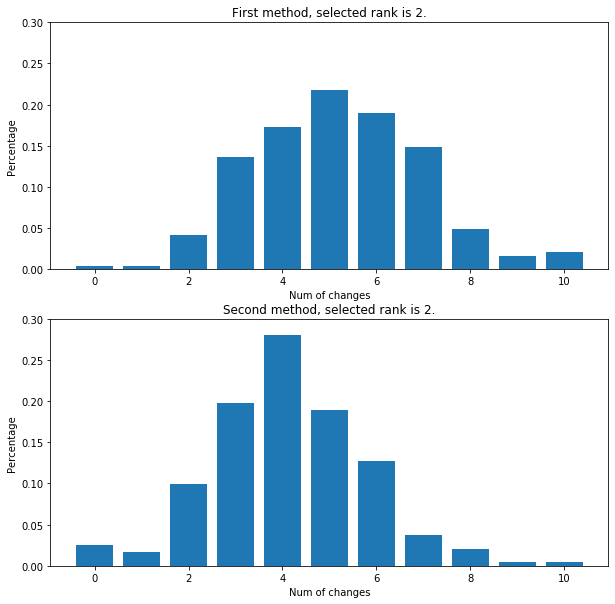

In [48]:
numChgs = []
for resObj in result.DetObjs:
    numChgs.append(len(resObj.ecpts))
numChgsCT = Counter(numChgs)

keys = sorted(list(numChgsCT.keys()))
numChgsList = [numChgsCT[key] for key in keys]

plt.figure(figsize=[10, 10])

plt.subplot(211)
plt.bar(keys, np.array(numChgsList)/243)
plt.ylim([0, 0.3])
plt.title("First method, selected rank is 2.")
plt.xlabel("Num of changes")
plt.ylabel("Percentage")

numChgs = []
for resObj in result2.DetObjs:
    numChgs.append(len(resObj.ecpts))
numChgsCT = Counter(numChgs)

keys = sorted(list(numChgsCT.keys()))
numChgsList = [numChgsCT[key] for key in keys]

plt.subplot(212)
plt.bar(keys, np.array(numChgsList)/243)
plt.title("Second method, selected rank is 2.")
plt.ylim([0, 0.3])
plt.xlabel("Num of changes")
plt.ylabel("Percentage")

### Change the rank range

I remove the `2` from the rank range

In [61]:
datDir = resDir/"fMRIHPFs_fixnchg5"
from collections import defaultdict as ddict

kappas = np.arange(1, 4, 0.01)
ranks = [4, 6, 8, 10, 12]
errsDic = ddict(list)
numDic = ddict(list)
for rank in ranks:
    fil = list(datDir.glob(f"*rank{rank}.pkl"))[0]
    with open(fil, "rb") as f:
        dat = pickle.load(f)
    DetObjs = dat.DetObjs
    for DetObj in DetObjs:
        numchgs = DetObj.numchgs
        errs = np.array(DetObj.MSEs)[numchgs]
        errsDic[rank].append(errs)
        numDic[rank].append(numchgs)

In [92]:
def minRank(errsDic, i):
    errs = []
    for rank in ranks:
        errsAll = np.array(errsDic[rank])
        errs.append(errsAll[:, i])
    errs = np.array(errs)
    return np.array(ranks)[np.argmin(errs, axis=0)]

def statNums(numDic, mRs, i):
    numchgs = []
    for idx, mR in enumerate(mRs):
        numchg = numDic[mR][idx][i]
        numchgs.append(numchg)
    res = edict()
    res.mean = np.mean(numchgs)
    res.var = np.var(numchgs)
    res.numchgs = numchgs
    return res

In [93]:
means = []
vars = []
for idx, ka in enumerate(kappas):
    mRs = minRank(errsDic, idx)
    stat = statNums(numDic, mRs, idx)
    means.append(stat.mean)
    vars.append(stat.var)
means = np.array(means)
vars = np.array(vars)

subKappas = kappas[np.logical_and(means<=6, means>=4)]
subVars = vars[np.logical_and(means<=6, means>=4)]

optKa = subKappas[np.argmin(subVars)]
optKaIdx = np.where(kappas==optKa)[0][0]

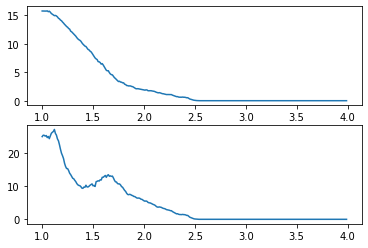

In [94]:
plt.subplot(211)
plt.plot(kappas, means)

plt.subplot(212)
plt.plot(kappas, vars)

In [95]:
mRs = minRank(errsDic, optKaIdx)
stat = statNums(numDic, mRs, optKaIdx)

Text(0.5, 0, 'num of changes')

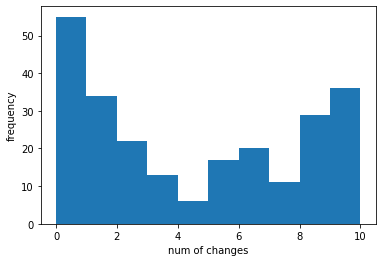

In [99]:
plt.hist(stat.numchgs)
plt.ylabel("frequency")
plt.xlabel("num of changes")

## Adjusting the rank adaptively

In [60]:
saveDir = resDir/"fMRIHPFs_rankAdap"
if not saveDir.exists():
    saveDir.mkdir()

    
#Lmin = 4
#lamb = 8e-5
#kappas = np.arange(1, 4, 0.01)
#
#numChgsAll = []
#DetObjs = []
#for ii in tqdm(range(243)):
#    Ymat = fMRIsHPF[ii]
#    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None)
#    DetRec()
#    DetRec.TuningKappa(kappas)
#    
#    DetObjs.append(DetRec)
#    numChgsAll.append(DetRec.numchgs)
#    
#numChgsArr = np.array(numChgsAll)
#meanChgs = numChgsArr.mean(axis=0)
#varChgs = numChgsArr.var(axis=0)
#subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
#subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
#optKa = subKappas[np.argmin(subVarChgs)]
#
## Update det obj
#errs = []
#for DetObj in DetObjs:
#    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#    errs.append(DetObj.GetCurMSE())
#err = np.mean(errs)
#
#result = edict()
#result.DetObjs = DetObjs
#result.Err = err
#result.kappa = optKa
#
#with open(saveDir/"fMRIResultAdapM8.pkl", "wb") as f:
#    pickle.dump(result, f)
    
with open(saveDir/"fMRIResultAdapM8.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

Text(0.5, 0, 'Ranks')

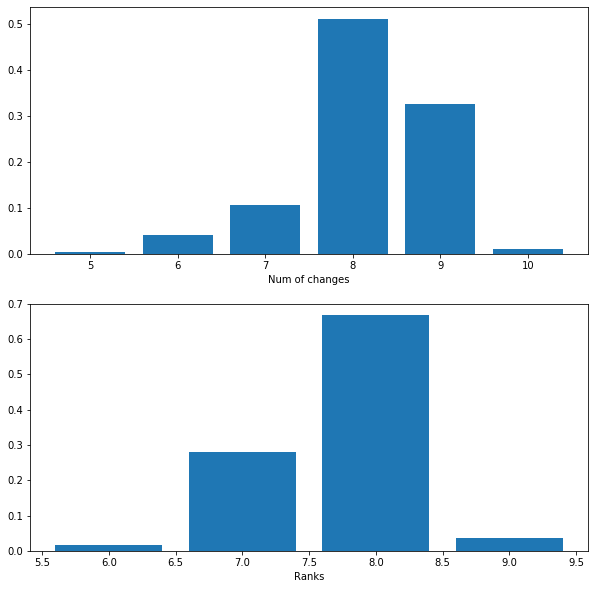

In [6]:
DetObjs = resultAdap.DetObjs
numchgs = []
nRanks = []
for DetObj in DetObjs:
    numchgs.append(len(DetObj.ecpts))
    nRanks.append(DetObj.paras.r)

numchgsCT = Counter(numchgs)
rankCT = Counter(nRanks)

keys = sorted(numchgsCT.keys())
ct = [numchgsCT[key] for key in keys]
rKeys = sorted(rankCT.keys())
rCt = [rankCT[key] for key in rKeys]

plt.figure(figsize=[10, 10])
plt.subplot(211)
plt.bar(keys, np.array(ct)/len(DetObjs))
plt.xlabel("Num of changes")

plt.subplot(212)
plt.bar(rKeys, np.array(rCt)/len(DetObjs))
plt.xlabel("Ranks")

### Try to find the demo

In [12]:
from pyTVDN.tmpUtils import *
import pickle
import scipy.stats as ss
import pandas as pd

fcRDF = pd.read_csv("../necessary files/AALICA.csv")
fcR = np.array(fcRDF)[:90, :]
names = list(fcRDF.columns)
names = [name.strip() for name in names]

fcR = np.array([minmax(fcR[:, i]) for i in range(7)])
fcR = fcR.T

wUs = []
for DetObj in DetObjs:
    wUs.append(obtainAbswU(DetObj))

In [34]:
corrs = ddict(list)
for absU in absUs:
    for j, name in enumerate(names):
        corrs[name].append(ss.pearsonr(fcR[:, j], absU)[0])

(90, 7)

In [39]:
def DistwU(wU):
    _, nSeg = wU.shape
    dists = []
    for i in range(nSeg-1):
        u1, u2 = wU[:, i], wU[:, i+1]
        u1, u2 = minmax(u1), minmax(u2)
        dist = np.sum((u1-u2)**2)
        dists.append(dist)
    return dists

def DistwUcorr(wU):
    _, nSeg = wU.shape
    corrs = []
    for i in range(nSeg):
        wu = wU[:, i]
        corr = []
        for j in range(7):
            corr.append(ss.pearsonr(fcR[:, j], wu)[0])
        corrs.append(np.array(corr))
        
    dists = []
    for i in range(nSeg-1):
        u1, u2 = corrs[i], corrs[i+1]
        dist = np.sum((u1-u2)**2)
        dists.append(dist)
    return dists

[ 95 229 237 119  49 153 143 131  82  24  73 128 152 219  83  25 126  99
 233  17 112  91 159 194  44  69 204 225  11  94  96 220 173   4 174 104
 234  61 105 142 205 187 190 144 155  21 116  76  60  70 207 232  43  48
 151  34  27  26  80 228 202 211 200 166   9 107  98 120  87 150  46 141
  18 201 231 157 217  92   3  93 203 197  15 124 122 227 214 139 239  50
 191 114 179 189 108  41 160 238  40  51 118  62  28  85 199 184  52  33
 212  30  10 135 148  53 215  59 109 132  63 222 213  23   1 193 223 186
 111  29  31   7 158 136 196 137  54 176  20 242 241 121 195 123 183  42
 177 182  19 125   0 163 101 164 224   6  66  58 149 103 226   2 162 154
 175  64 110  65  16 140 156  77 188 170 236 145  13 100 172 171  67 161
   5 240 198 117 127  57 167  81  71  84 168 102  78  14  86 130 210 134
  39 221 133 209 180  32 165  88  47 113 106 115 147  37 216  75  68 181
 178 185 208  56 138 230 206  38 235  74  12  55 129  79 169 146  97  90
  89  45  35   8  22 218  36 192  72]


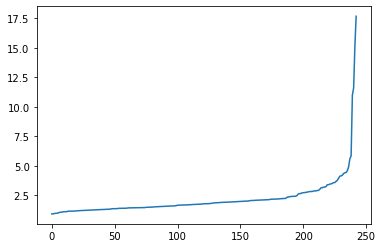

In [7]:
errs = []
for DetObj in DetObjs:
    errs.append(DetObj.GetCurMSE())
    
plt.plot(np.sort(errs))
argIdxs = np.argsort(errs)
print(argIdxs)

In [10]:
import pandas as pd
subArgIdxs = argIdxs[:50]
numFirst = [len(DetObjs[idx].ecpts) for idx in subArgIdxs]
dic = {"Idx":subArgIdxs, "num": numFirst}
pd.DataFrame(dic)

,Idx,num
0,95,9
1,229,8
2,237,9
3,119,9
4,49,9
5,153,8
6,143,9
7,131,8
8,82,8
9,24,8


In [46]:
goodIdxs = []
for idx, wU in enumerate(wUs):
    dist1 = DistwU(wU)
    dist2 = DistwUcorr(wU)
    if np.min(dist1)>=2 and np.min(dist2)>=0.1:
        goodIdxs.append(idx)
goodIdxs

+-------------+------------------------------------------------+--------------------+------+
| Num of CPTs |                 Estiamted CPTs                 |        MSE         | Rank |
+-------------+------------------------------------------------+--------------------+------+
|      9      | [ 22.  38.  55.  70.  81.  96. 111. 123. 138.] | 4.4213443808553246 |  8   |
+-------------+------------------------------------------------+--------------------+------+


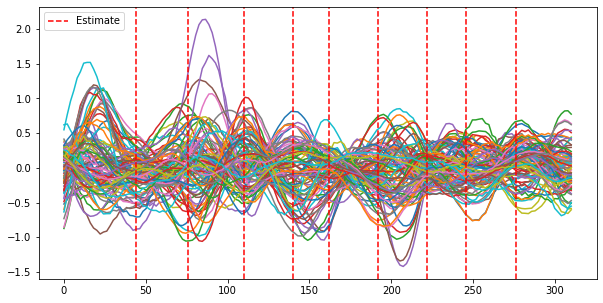

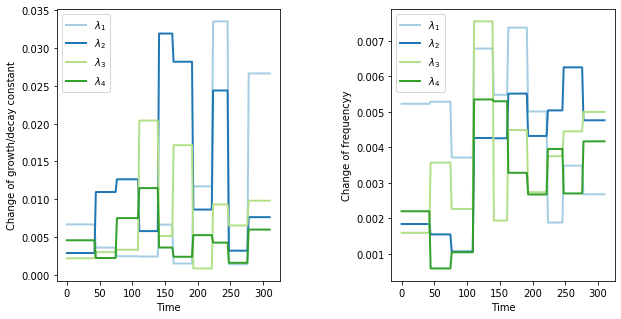

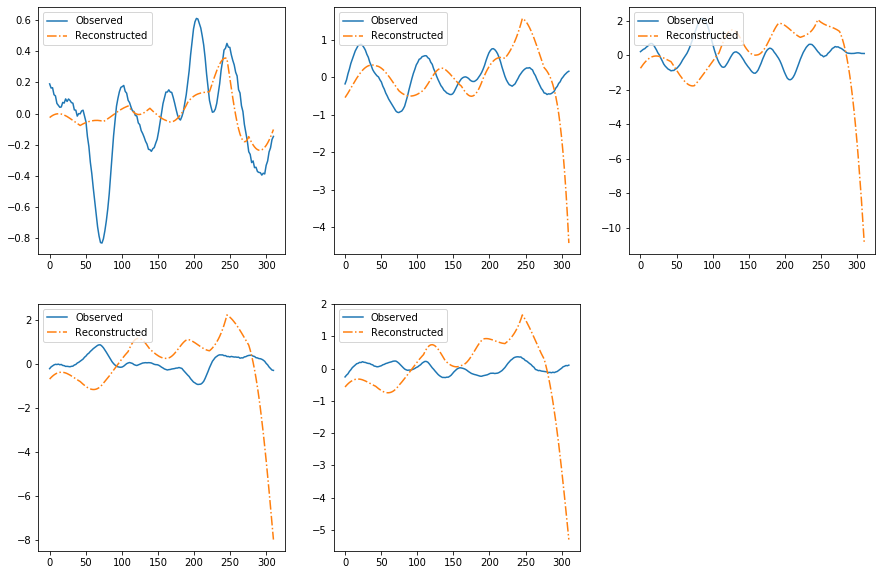

array([50, 51, 24, 23,  7])

In [55]:
from pyTVDN.tmpUtils import *
idx = 89
DetObj = DetObjs[idx]
print(DetObj)
DetObj.PlotEcpts()
DetObj.PlotEigenCurve()
DetObj.PlotRecCurve()

In [53]:
wU = obtainAbswU(DetObj)
tmpf = saveDir/f"fMRI{idx}wU.txt"
np.savetxt(tmpf, wU)

robj.r(f"filName <- paste0('{tmpf.__str__()}')")
robj.r(f"idx <- {idx}")
robj.r(f"prefixOut <- paste0('{saveDir.__str__()}', '/fMRIM8_')")
robj.r.source("../Rcode/saveNiiPy.R")

value,[RTYPES.NILSXP]
visible,[RTYPES.LGLSXP]


## h tuning


In [56]:
saveDir = resDir/"fMRIHPFs_rankAdap"
if not saveDir.exists():
    saveDir.mkdir()
    
fcts = np.array([0.04, 0.09, 0.17, 0.30, 0.43, 0.87]) * 2
Lmin = 4
lamb = 8e-5
kappas = np.arange(1, 4, 0.01)

In [58]:
fct = fcts[0]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(243)):
    Ymat = fMRIsHPF[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [59]:
fct = fcts[1]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(243)):
    Ymat = fMRIsHPF[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [60]:
fct = fcts[2]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(243)):
    Ymat = fMRIsHPF[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [61]:
fct = fcts[3]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(243)):
    Ymat = fMRIsHPF[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [62]:
fct = fcts[4]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(243)):
    Ymat = fMRIsHPF[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [63]:
fct = fcts[5]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(243)):
    Ymat = fMRIsHPF[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

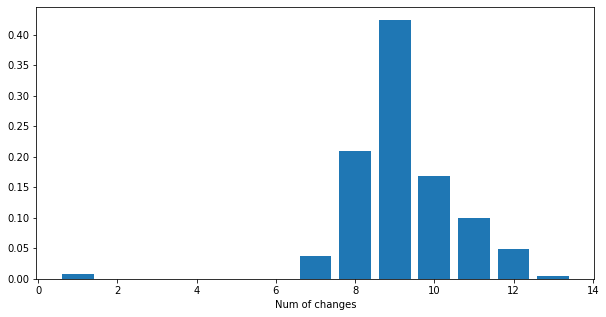

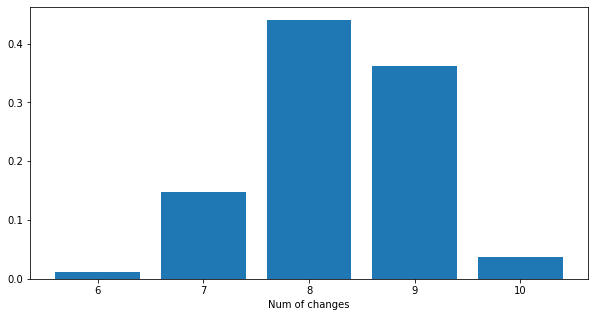

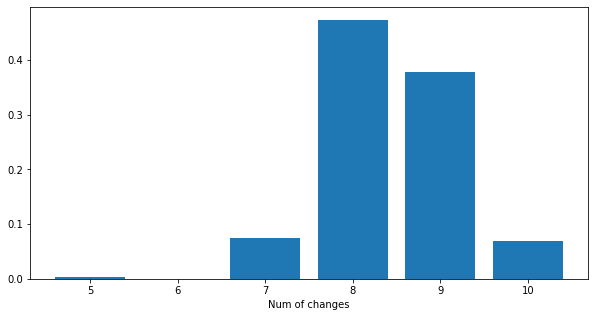

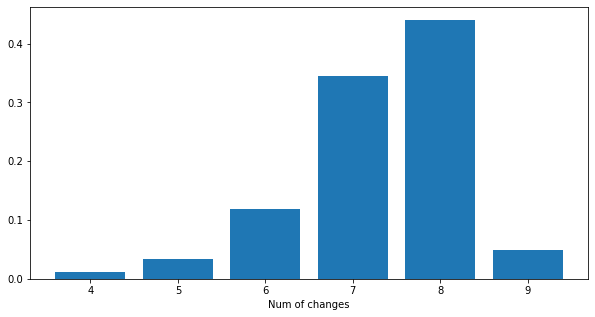

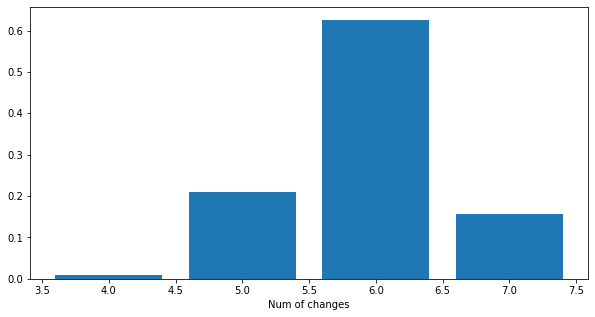

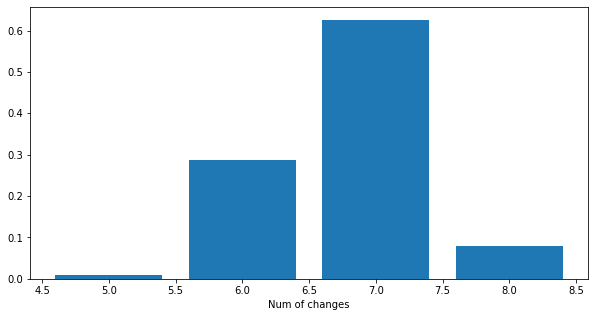

In [64]:
for fct in fcts:
    with open(saveDir/f"fMRIResultAdapM8N_fct{int(fct*100)}.pkl", "rb") as f:
        resultAdap = pickle.load(f)
        
    optKa = resultAdap.kappa
    DetObjs = resultAdap.DetObjsDetObjs = resultAdap.DetObjs
    numchgs = []
    nRanks = []
    for DetObj in DetObjs:
        numchgs.append(len(DetObj.ecpts))
        nRanks.append(DetObj.paras.r)
    
    numchgsCT = Counter(numchgs)
    rankCT = Counter(nRanks)
    
    keys = sorted(numchgsCT.keys())
    ct = [numchgsCT[key] for key in keys]
    rKeys = sorted(rankCT.keys())
    rCt = [rankCT[key] for key in rKeys]
    
    plt.figure(figsize=[10, 5])
    plt.bar(keys, np.array(ct)/len(DetObjs))
    plt.xlabel("Num of changes")
    
    #plt.bar(rKeys, np.array(rCt)/len(DetObjs))
    #plt.xlabel("Ranks")

## fMRI sperately and rank is selected adaptively

The first 103 subjects are healthy
The rest are diseased

In [7]:
fMRIsHPF_H = fMRIsHPF[:103]
fMRIsHPF_D = fMRIsHPF[103:]

In [9]:
saveDir = resDir/"fMRIHPFs_sep"
if not saveDir.exists():
    saveDir.mkdir()

    
# Lmin = 4
# lamb = 8e-5
# kappas = np.arange(1, 4, 0.01)
# 
# numChgsAll = []
# DetObjs = []
# for ii in tqdm(range(len(fMRIsHPF_H))):
#     Ymat = fMRIsHPF_H[ii]
#     DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
#                       saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None)
#     DetRec()
#     DetRec.TuningKappa(kappas)
#     
#     DetObjs.append(DetRec)
#     numChgsAll.append(DetRec.numchgs)
#     
# numChgsArr = np.array(numChgsAll)
# meanChgs = numChgsArr.mean(axis=0)
# varChgs = numChgsArr.var(axis=0)
# subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
# subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
# optKa = subKappas[np.argmin(subVarChgs)]
# 
# # Update det obj
# errs = []
# for DetObj in DetObjs:
#     DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
#     errs.append(DetObj.GetCurMSE())
# err = np.mean(errs)
# 
# result = edict()
# result.DetObjs = DetObjs
# result.Err = err
# result.kappa = optKa
# 
# with open(saveDir/"fMRIResultAdap_healthy.pkl", "wb") as f:
#     pickle.dump(result, f)
#     
with open(saveDir/"fMRIResultAdap_healthy.pkl", "rb") as f:
    resultsH = pickle.load(f)

Text(0.5, 0, 'Ranks')

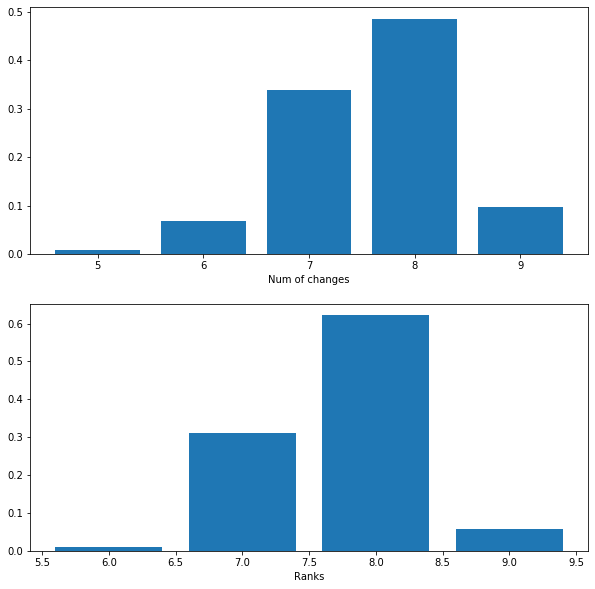

In [12]:
DetObjs = resultsH.DetObjs
numchgs = []
nRanks = []
for DetObj in DetObjs:
    numchgs.append(len(DetObj.ecpts))
    nRanks.append(DetObj.paras.r)

numchgsCT = Counter(numchgs)
rankCT = Counter(nRanks)

keys = sorted(numchgsCT.keys())
ct = [numchgsCT[key] for key in keys]
rKeys = sorted(rankCT.keys())
rCt = [rankCT[key] for key in rKeys]

plt.figure(figsize=[10, 10])
plt.subplot(211)
plt.bar(keys, np.array(ct)/len(DetObjs))
plt.xlabel("Num of changes")

plt.subplot(212)
plt.bar(rKeys, np.array(rCt)/len(DetObjs))
plt.xlabel("Ranks")

In [13]:
Lmin = 4
lamb = 8e-5
kappas = np.arange(1, 4, 0.01)

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/"fMRIResultAdap_diseased.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/"fMRIResultAdap_diseased.pkl", "rb") as f:
    resultsD = pickle.load(f)

Text(0.5, 0, 'Ranks')

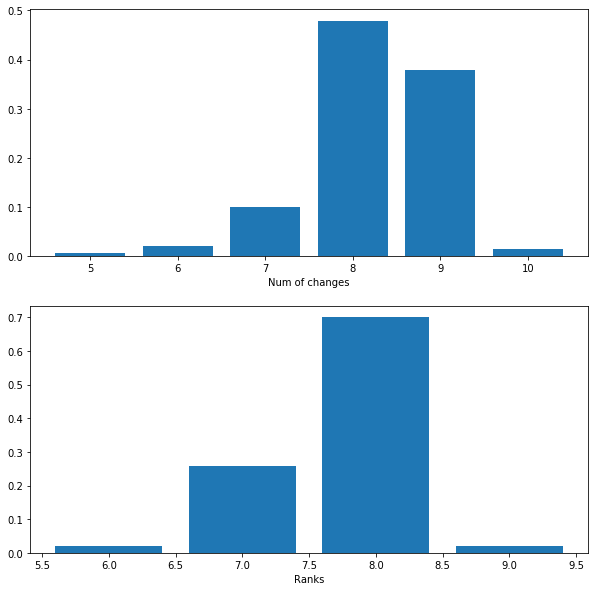

In [14]:
DetObjs = resultsD.DetObjs
numchgs = []
nRanks = []
for DetObj in DetObjs:
    numchgs.append(len(DetObj.ecpts))
    nRanks.append(DetObj.paras.r)

numchgsCT = Counter(numchgs)
rankCT = Counter(nRanks)

keys = sorted(numchgsCT.keys())
ct = [numchgsCT[key] for key in keys]
rKeys = sorted(rankCT.keys())
rCt = [rankCT[key] for key in rKeys]

plt.figure(figsize=[10, 10])
plt.subplot(211)
plt.bar(keys, np.array(ct)/len(DetObjs))
plt.xlabel("Num of changes")

plt.subplot(212)
plt.bar(rKeys, np.array(rCt)/len(DetObjs))
plt.xlabel("Ranks")

In [15]:
numchgsH = []
nRanksH = []
numchgsD = []
nRanksD = []
for DetObj in resultsH.DetObjs:
    numchgsH.append(len(DetObj.ecpts))
    nRanksH.append(DetObj.paras.r)
    
for DetObj in resultsD.DetObjs:
    numchgsD.append(len(DetObj.ecpts))
    nRanksD.append(DetObj.paras.r)
    
bins = np.arange(0.5, 13, 1)
nums = np.arange(1, 13, 1)
rbins = np.arange(5.5, 10, 1)
rnums = np.arange(6, 10, 1)

countsH, _ = np.histogram(numchgsH, bins=bins)
countsD, _ = np.histogram(numchgsD, bins=bins)
ratesH = countsH/np.sum(countsH)
ratesD = countsD/np.sum(countsD)

rCountsH, _ = np.histogram(nRanksH, bins=rbins)
rCountsD, _ = np.histogram(nRanksD, bins=rbins)
rRatesH = rCountsH/np.sum(rCountsH)
rRatesD = rCountsD/np.sum(rCountsD)

<BarContainer object of 12 artists>

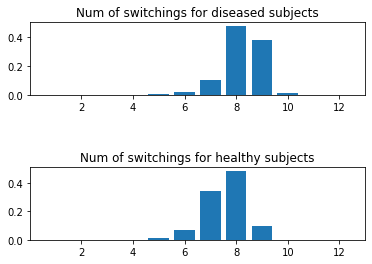

In [18]:
plt.subplots_adjust(wspace=0, hspace=1)
plt.subplot(211)
plt.title("Num of switchings for diseased subjects")
plt.bar(nums, ratesD)
plt.subplot(212)
plt.title("Num of switchings for healthy subjects")
plt.bar(nums, ratesH)

<BarContainer object of 4 artists>

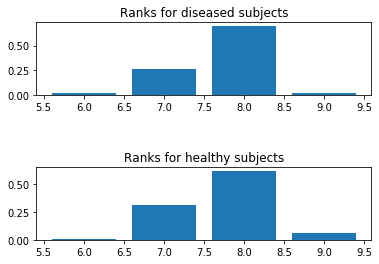

In [19]:
plt.subplots_adjust(wspace=0, hspace=1)
plt.subplot(211)
plt.title("Ranks for diseased subjects")
plt.bar(rnums, rRatesD)
plt.subplot(212)
plt.title("Ranks for healthy subjects")
plt.bar(rnums, rRatesH)

### Change the kappa selection a bit

dict_keys(['DetObjs', 'Err', 'kappa'])


Text(0, 0.5, 'variance')

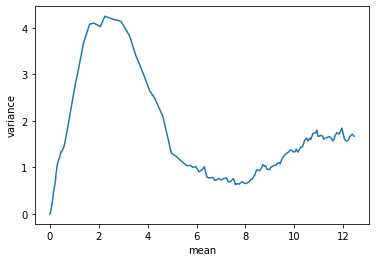

In [36]:
saveDir = resDir/"fMRIHPFs_sep"
with open(saveDir/"fMRIResultAdap_healthy.pkl", "rb") as f:
    resultsH = pickle.load(f)
    
numChgsAll = []
DetObjs = []
for DetObj in resultsH.DetObjs:
     numChgsAll.append(DetObj.numchgs)
     
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=15, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=15, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
for DetObj in resultsH.DetObjs:
     DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
        
plt.plot(meanChgs, varChgs)
plt.xlabel("mean")
plt.ylabel("variance")

Text(0, 0.5, 'variance')

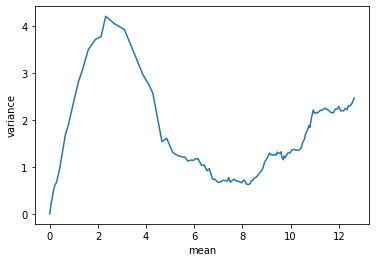

In [44]:
saveDir = resDir/"fMRIHPFs_sep"
with open(saveDir/"fMRIResultAdap_diseased.pkl", "rb") as f:
    resultsD = pickle.load(f)
    
numChgsAll = []
DetObjs = []
for DetObj in resultsD.DetObjs:
     numChgsAll.append(DetObj.numchgs)
     
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=15, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=15, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
for DetObj in resultsD.DetObjs:
     DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
        
plt.plot(meanChgs, varChgs)
plt.xlabel("mean")
plt.ylabel("variance")

### analysis of U 

1. correlation

2. clustering 

3. etc

In [47]:
import pandas as pd
from pyTVDN.tmpUtils import *
import scipy.stats as ss

fcRDF = pd.read_csv("../necessary files/AALICA.csv")
fcR = np.array(fcRDF)[:90, :]
names = list(fcRDF.columns)
names = [name.strip() for name in names]

fcR = np.array([minmax(fcR[:, i]) for i in range(7)])
fcR = fcR.T

In [49]:
saveDir = resDir/"fMRIHPFs_sep"
with open(saveDir/"fMRIResultAdap_healthy.pkl", "rb") as f:
    resultsH = pickle.load(f)
    

Us = []
for DetObj in resultsH.DetObjs:
    r = DetObj.paras.r
    rUs = DetObj.midRes.eigVecs[:, :r]
    kpidxs = np.where(np.diff(np.concatenate([[np.Inf], np.abs(rUs[0, :])])) != 0)[0]
    for ix in kpidxs:
        Us.append(rUs[:, ix])
        
absUs = np.array(np.abs(Us))
absUsList =[minmax(absUs[i, :]) for i in range(absUs.shape[0])]
absUsH = np.array(absUsList)

In [50]:
saveDir = resDir/"fMRIHPFs_sep"
with open(saveDir/"fMRIResultAdap_diseased.pkl", "rb") as f:
    resultsD = pickle.load(f)
    

Us = []
for DetObj in resultsD.DetObjs:
    r = DetObj.paras.r
    rUs = DetObj.midRes.eigVecs[:, :r]
    kpidxs = np.where(np.diff(np.concatenate([[np.Inf], np.abs(rUs[0, :])])) != 0)[0]
    for ix in kpidxs:
        Us.append(rUs[:, ix])
        
absUs = np.array(np.abs(Us))
absUsList =[minmax(absUs[i, :]) for i in range(absUs.shape[0])]
absUsD = np.array(absUsList)

absUsall = np.concatenate([absUsD, absUsH])

(array([70., 70., 66., 56., 55., 59., 41.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

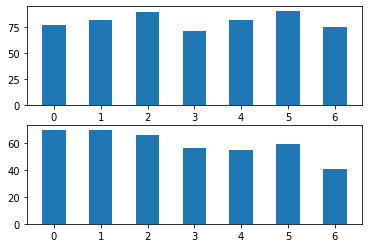

In [93]:
from sklearn.cluster import KMeans

nc = 7
kmeans = KMeans(n_clusters=nc).fit(absUsall)
labs = kmeans.labels_

bd = 564
Dlabs= labs[:bd]
Hlabs= labs[bd:]

plt.subplot(211)
plt.hist(Dlabs, bins=np.arange(-0.5, nc, 1), rwidth=0.5)
plt.subplot(212)
plt.hist(Hlabs, bins=np.arange(-0.5, nc, 1), rwidth=0.5)

In [109]:
from collections import defaultdict as ddict
Dcorrs = ddict(list)
for absU in absUsD:
    for j, name in enumerate(names):
        Dcorrs[name].append(ss.pearsonr(fcR[:, j], absU)[0])
        
DcorDF = pd.DataFrame(Dcorrs)
DcorArr = np.array(DcorDF)

Hcorrs = ddict(list)
for absU in absUsH:
    for j, name in enumerate(names):
        Hcorrs[name].append(ss.pearsonr(fcR[:, j], absU)[0])
        
HcorDF = pd.DataFrame(Hcorrs)
HcorArr = np.array(HcorDF)

In [110]:
HabsMax = np.argmax(np.abs(HcorArr), axis=1)
DabsMax = np.argmax(np.abs(DcorArr), axis=1)

HMax = np.argmax(HcorArr, axis=1)
DMax = np.argmax(DcorArr, axis=1)

HMin = np.argmin(HcorArr, axis=1)
DMin = np.argmin(DcorArr, axis=1)

(array([ 57., 144.,  22., 104.,  12.,  20.,  58.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

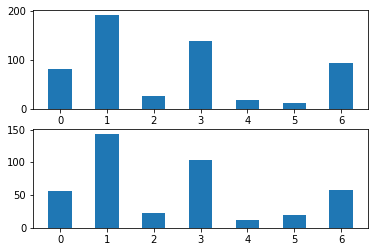

In [111]:
plt.subplot(211)
plt.hist(DMin, bins=np.arange(-0.5, 7, 1), rwidth=0.5)
plt.subplot(212)
plt.hist(HMin, bins=np.arange(-0.5, 7, 1), rwidth=0.5)

(array([103.,   7.,  38.,   9., 124., 107.,  29.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

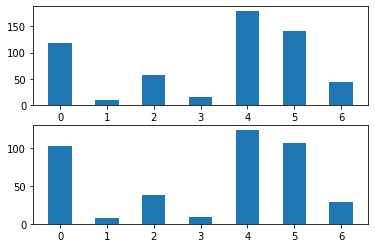

In [112]:
plt.subplot(211)
plt.hist(DMax, bins=np.arange(-0.5, 7, 1), rwidth=0.5)
plt.subplot(212)
plt.hist(HMax, bins=np.arange(-0.5, 7, 1), rwidth=0.5)

(array([67., 51., 36., 50., 95., 95., 23.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

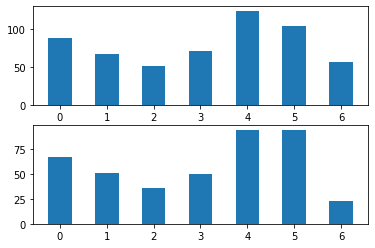

In [113]:
plt.subplot(211)
plt.hist(DabsMax, bins=np.arange(-0.5, 7, 1), rwidth=0.5)
plt.subplot(212)
plt.hist(HabsMax, bins=np.arange(-0.5, 7, 1), rwidth=0.5)

## h tuning for fMRI data from healthy subjects


In [115]:
saveDir = resDir/"fMRIHPFs_sep"
if not saveDir.exists():
    saveDir.mkdir()
    
fcts = np.array([0.04, 0.09, 0.17, 0.30, 0.43, 0.87]) * 2
Lmin = 4
lamb = 8e-5
kappas = np.arange(1, 4, 0.01)

In [116]:
fct = fcts[0]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_H))):
    Ymat = fMRIsHPF_H[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [117]:
fct = fcts[1]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_H))):
    Ymat = fMRIsHPF_H[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [118]:
fct = fcts[2]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_H))):
    Ymat = fMRIsHPF_H[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [119]:
fct = fcts[3]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_H))):
    Ymat = fMRIsHPF_H[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [120]:
fct = fcts[4]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_H))):
    Ymat = fMRIsHPF_H[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [121]:
fct = fcts[5]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_H))):
    Ymat = fMRIsHPF_H[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_healthy_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

### Try to find the demo

In [151]:
from pyTVDN.tmpUtils import *
import pickle
import scipy.stats as ss
import pandas as pd

fcRDF = pd.read_csv("../necessary files/AALICA.csv")
fcR = np.array(fcRDF)[:90, :]
names = list(fcRDF.columns)
names = [name.strip() for name in names]

fcR = np.array([minmax(fcR[:, i]) for i in range(7)])
fcR = fcR.T

wUs = []
for DetObj in resultsH.DetObjs:
    wUs.append(obtainAbswU(DetObj))

In [152]:
def DistwU(wU):
    _, nSeg = wU.shape
    dists = []
    for i in range(nSeg-1):
        u1, u2 = wU[:, i], wU[:, i+1]
        u1, u2 = minmax(u1), minmax(u2)
        dist = np.sum((u1-u2)**2)
        dists.append(dist)
    return dists

def DistwUcorr(wU):
    _, nSeg = wU.shape
    corrs = []
    for i in range(nSeg):
        wu = wU[:, i]
        wu = minmax(wu)
        corr = []
        for j in range(7):
            corr.append(ss.pearsonr(fcR[:, j], wu)[0])
        corrs.append(np.array(corr))
        
    dists = []
    for i in range(nSeg-1):
        u1, u2 = corrs[i], corrs[i+1]
        dist = np.sum((u1-u2)**2)
        dists.append(dist)
    return dists

[ 56  99  58  45  54  86   2  24  82  81  51  64  44  70  98  34  80  20
  83  11  67 102   7  43  91  17  75  22  18  50   3   8  23   5  85  96
  90  87 100  72   9  15   1  33  46  66  36   4  71  84  37  76  19  92
  68  93  79  10  60  48  42  31  52  49  61  28  12  69  16  74  35  14
  39 101  38  25  89  57  77  95  73  63  59  27  26  32  62  55   6  94
  21  47  30  40  97   0  41  53  13  78  29  65  88] 103


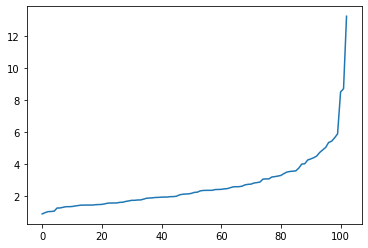

In [153]:
errs = []
for DetObj in DetObjs:
    errs.append(DetObj.GetCurMSE())
    
plt.plot(np.sort(errs))
argIdxs = np.argsort(errs)
print(argIdxs, len(argIdxs))

In [154]:
import pandas as pd
subArgIdxs = argIdxs[:50]
numFirst = [len(DetObjs[idx].ecpts) for idx in subArgIdxs]
dic = {"Idx":subArgIdxs, "num": numFirst}
#pd.DataFrame(dic)

In [164]:
goodIdxs = []
for idx, wU in enumerate(wUs):
    dist1 = DistwU(wU)
    dist2 = DistwUcorr(wU)
    if np.mean(dist1)>=4 and np.mean(dist2)>=0.25:
        goodIdxs.append(idx)
goodIdxs

[14, 63, 89, 91]

+-------------+-------------------------------------------+--------------------+------+
| Num of CPTs |               Estiamted CPTs              |        MSE         | Rank |
+-------------+-------------------------------------------+--------------------+------+
|      8      | [ 20.  38.  56.  73.  85. 103. 124. 138.] | 1.1852634181757375 |  7   |
+-------------+-------------------------------------------+--------------------+------+


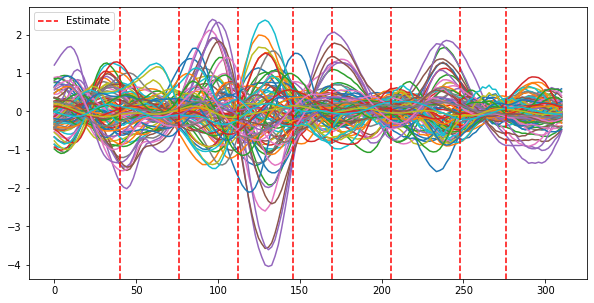

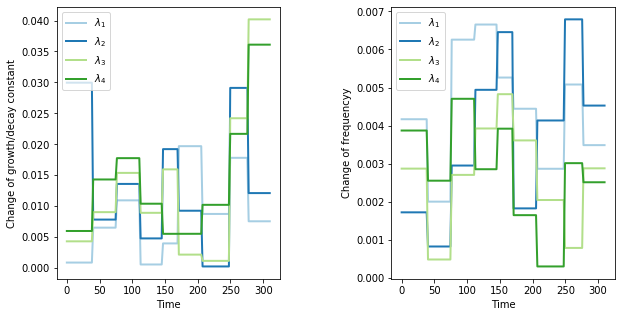

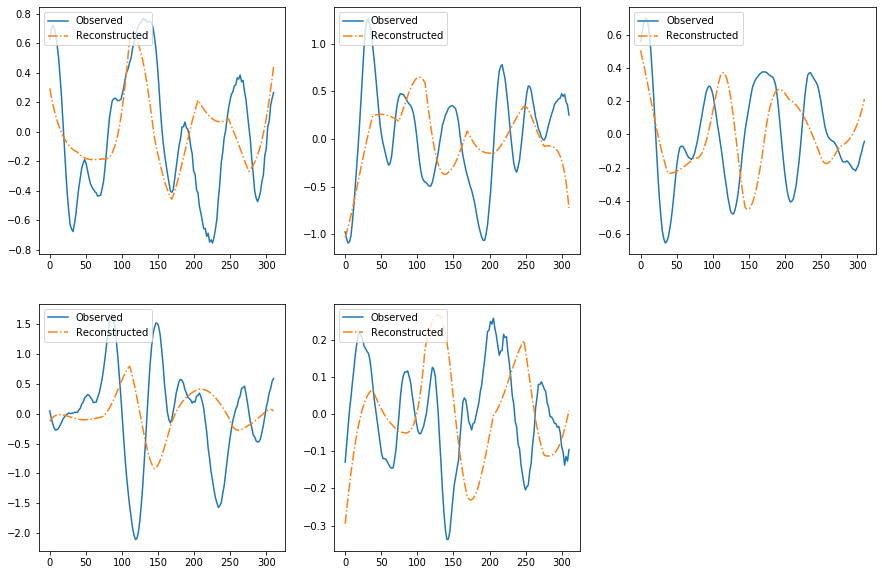

array([60, 42, 84, 40, 73])

In [171]:
from pyTVDN.tmpUtils import *
idx = 91
DetObj = resultsH.DetObjs[idx]
print(DetObj)
DetObj.PlotEcpts()
DetObj.PlotEigenCurve()
DetObj.PlotRecCurve()

In [172]:
wU = obtainAbswU(DetObj)
tmpf = saveDir/f"fMRI{idx}wU.txt"
np.savetxt(tmpf, wU)

robj.r(f"filName <- paste0('{tmpf.__str__()}')")
robj.r(f"idx <- {idx}")
robj.r(f"prefixOut <- paste0('{saveDir.__str__()}', '/fMRIM8_')")
robj.r.source("../Rcode/saveNiiPy.R")

value,[RTYPES.NILSXP]
visible,[RTYPES.LGLSXP]


## h tuning for fMRI data from diseased subjects


In [173]:
saveDir = resDir/"fMRIHPFs_sep"
if not saveDir.exists():
    saveDir.mkdir()
    
fcts = np.array([0.04, 0.09, 0.17, 0.30, 0.43, 0.87]) * 2
Lmin = 4
lamb = 8e-5
kappas = np.arange(1, 4, 0.01)

In [174]:
fct = fcts[0]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [175]:
fct = fcts[1]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [176]:
fct = fcts[2]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [177]:
fct = fcts[3]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [178]:
fct = fcts[4]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

In [179]:
fct = fcts[5]

numChgsAll = []
DetObjs = []
for ii in tqdm(range(len(fMRIsHPF_D))):
    Ymat = fMRIsHPF_D[ii]
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", MaxM=20, is_detrend=False,
                      saveDir=None, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=2, r=None, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    
    DetObjs.append(DetRec)
    numChgsAll.append(DetRec.numchgs)
    
numChgsArr = np.array(numChgsAll)
meanChgs = numChgsArr.mean(axis=0)
varChgs = numChgsArr.var(axis=0)
subVarChgs = varChgs[np.logical_and(meanChgs<=10, meanChgs>=1)]
subKappas = kappas[np.logical_and(meanChgs<=10, meanChgs>=1)]
optKa = subKappas[np.argmin(subVarChgs)]

# Update det obj
errs = []
for DetObj in DetObjs:
    DetObj.UpdateEcpts(DetObj.numchgs[kappas==optKa][0])
    errs.append(DetObj.GetCurMSE())
err = np.mean(errs)

result = edict()
result.DetObjs = DetObjs
result.Err = err
result.kappa = optKa

with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "wb") as f:
    pickle.dump(result, f)
    
with open(saveDir/f"fMRIResultAdap_diseased_fct{int(fct*100)}.pkl", "rb") as f:
    resultAdap = pickle.load(f)
    
optKa = resultAdap.kappa
DetObjs = resultAdap.DetObjs

### Try to find the demo

In [180]:
from pyTVDN.tmpUtils import *
import pickle
import scipy.stats as ss
import pandas as pd

fcRDF = pd.read_csv("../necessary files/AALICA.csv")
fcR = np.array(fcRDF)[:90, :]
names = list(fcRDF.columns)
names = [name.strip() for name in names]

fcR = np.array([minmax(fcR[:, i]) for i in range(7)])
fcR = fcR.T

wUs = []
for DetObj in resultsD.DetObjs:
    wUs.append(obtainAbswU(DetObj))

In [181]:
def DistwU(wU):
    _, nSeg = wU.shape
    dists = []
    for i in range(nSeg-1):
        u1, u2 = wU[:, i], wU[:, i+1]
        u1, u2 = minmax(u1), minmax(u2)
        dist = np.sum((u1-u2)**2)
        dists.append(dist)
    return dists

def DistwUcorr(wU):
    _, nSeg = wU.shape
    corrs = []
    for i in range(nSeg):
        wu = wU[:, i]
        wu = minmax(wu)
        corr = []
        for j in range(7):
            corr.append(ss.pearsonr(fcR[:, j], wu)[0])
        corrs.append(np.array(corr))
        
    dists = []
    for i in range(nSeg-1):
        u1, u2 = corrs[i], corrs[i+1]
        dist = np.sum((u1-u2)**2)
        dists.append(dist)
    return dists

In [201]:
goodIdxs = []
for idx, wU in enumerate(wUs):
    dist1 = DistwU(wU)
    dist2 = DistwUcorr(wU)
    if np.mean(dist1)>=4 and np.mean(dist2)>=0.198:
        goodIdxs.append(idx)
goodIdxs

[83, 96, 109, 124]

+-------------+-------------------------------------------+--------------------+------+
| Num of CPTs |               Estiamted CPTs              |        MSE         | Rank |
+-------------+-------------------------------------------+--------------------+------+
|      8      | [ 21.  38.  54.  73.  93. 104. 120. 134.] | 1.6839865653751969 |  8   |
+-------------+-------------------------------------------+--------------------+------+


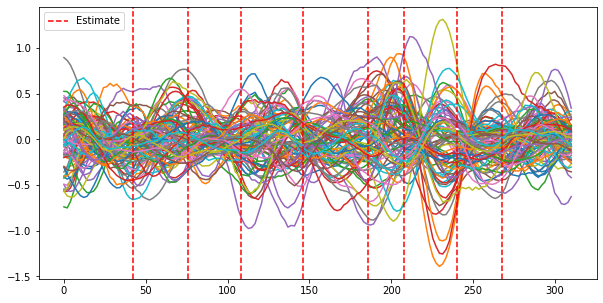

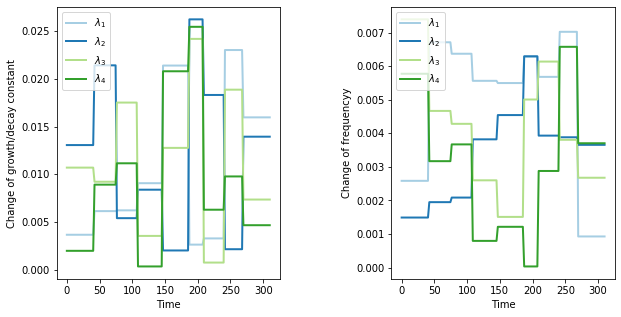

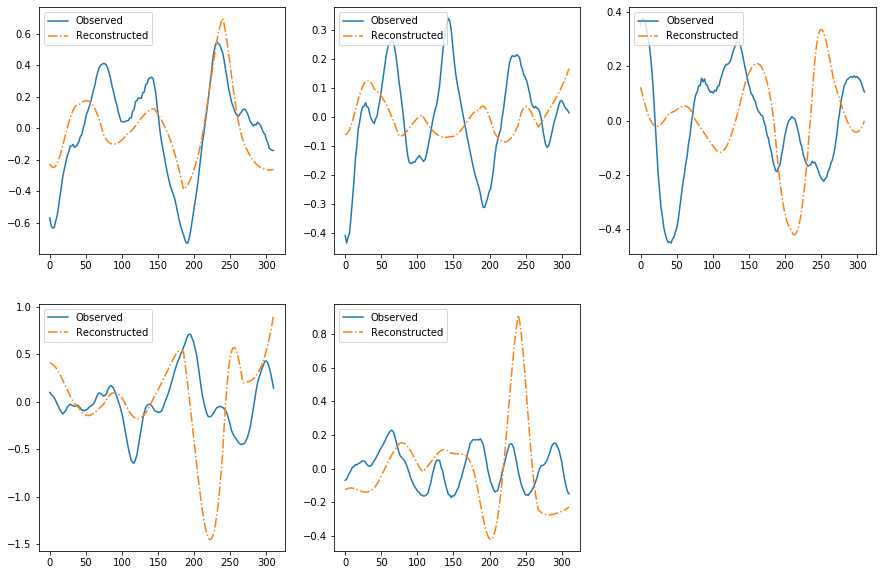

array([48, 50, 83, 25, 39])

In [202]:
from pyTVDN.tmpUtils import *
idx = 109
DetObj = resultsD.DetObjs[idx]
print(DetObj)
DetObj.PlotEcpts()
DetObj.PlotEigenCurve()
DetObj.PlotRecCurve()

In [203]:
wU = obtainAbswU(DetObj)
tmpf = saveDir/f"fMRI{idx}wU_diseased.txt"
np.savetxt(tmpf, wU)

robj.r(f"filName <- paste0('{tmpf.__str__()}')")
robj.r(f"idx <- {idx}")
robj.r(f"prefixOut <- paste0('{saveDir.__str__()}', '/fMRIM8_')")
robj.r.source("../Rcode/saveNiiPy.R")

value,[RTYPES.NILSXP]
visible,[RTYPES.LGLSXP]
